In [3]:
#importing every library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam
from keras import  backend as K
from keras.datasets import mnist
import os
import numpy as np
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
(x_train, y_train),(x_test, y_test) = mnist.load_data()

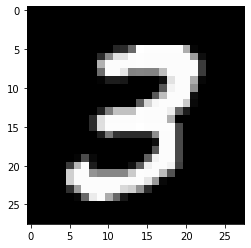

3


In [4]:
import matplotlib.pyplot as plt
import numpy as np
id = 7
image = np.array(x_train[id], dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(y_train[id])

In [5]:

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
image_size = x_train.shape[1]
input_size = image_size*image_size
print(input_size)

784


In [9]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [55]:
import numpy as np
from statistics import *
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y = train_test_split(x_train, y_train, test_size=0.16,random_state=42)
#making different yper paramters for our model
beta_1=[0.87,0.88,0.89,0.9,.91,.92,.92,.93,.9,.91]
beta_2=[0.991,0.992,0.993,0.999,0.999,0.999,0.999,0.999,0.999,0.999]
learning_rate=[.02,.02,.03,.03,.04,.04,.05,.05,.05,.1]
initial_accumulator_value=[0.5,0.5,0.6,0.6,0.7,0.6,0.6,0.7,0.5,0.7]

In [76]:
class NN:
    def __init__(self,n1,n2,train_x,val_x,train_y,val_y,test_x,test_y,batch_size,epochs,verbose,i,beta_1,beta_2,learning_rate,initial_accumulator_value):
        self.n1 =n1#initilizing the parameters
        self.n2 =n2
        self.i = i
        self.train_x=train_x
        self.train_y=train_y
        self.val_x=val_x
        self.val_y=val_y
        self.test_x=test_x
        self.test_y=test_y
        self.beta_1=beta_1
        self.beta_2=beta_2
        self.learning_rate=learning_rate
        self.initial_accumulator_value=initial_accumulator_value
    def ADAM(self):
        i=self.i
        beta_1=self.beta_1
        beta_2=self.beta_2
        learning_rate=self.learning_rate
        initial_accumulator_value=self.initial_accumulator_value
        model = Sequential()#making our initial model with .20 drop and optimization
        model.add(Dense(self.n1, input_dim=input_size, activation='sigmoid'))
        model.add(Dropout(.2))
        model.add(Dense(self.n2, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate[i], beta_1=beta_1[i], beta_2=beta_2[i], epsilon=1e-07, amsgrad=False, name="Adam"),metrics=['accuracy'])
        history_init = model.fit((self.train_x), (self.train_y),validation_data=((self.val_x),(self.val_y)),batch_size=68,epochs=100, verbose = 2)
        x = mean(history_init.history['accuracy'])
        print('Accuracy: %.2f' % (x*100))   
        return (model,x*100)
    def RMSPROP(self):
        i=self.i
        beta_1=self.beta_1
        beta_2=self.beta_2
        learning_rate=self.learning_rate
        initial_accumulator_value=self.initial_accumulator_value
        model = Sequential()
        model.add(Dense(self.n1, input_dim=input_size, activation='softmax'))
        model.add(Dropout(.2))
        model.add(Dense(self.n2, activation='softmax'))
        model.compile(loss='categorical_crossentropy',metrics = ['accuracy'], optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate[i], rho=0.2, momentum=0.9, epsilon=1e-07, centered=False, name="RMSprop"))
        history_init = model.fit((self.train_x), (self.train_y),validation_data=((self.val_x),(self.val_y)),batch_size=68,epochs=100, verbose = 2)
        x = mean(history_init.history['accuracy'])
        print('Accuracy: %.2f' % (x*100))   
        return (model,x*100)
    def SGD(self):
        i=self.i
        beta_1=self.beta_1
        beta_2=self.beta_2
        learning_rate=self.learning_rate
        initial_accumulator_value=self.initial_accumulator_value
        model = Sequential()
        model.add(Dense(self.n1, input_dim=input_size, activation='softmax'))
        model.add(Dropout(.2))
        model.add(Dense(self.n2, activation='softmax'))
        model.compile(loss='categorical_crossentropy',metrics = ['accuracy'], optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate[i], momentum=0.0, nesterov=False, name="SGD"))     
        history_init = model.fit((self.train_x), (self.train_y),validation_data=((self.val_x),(self.val_y)),batch_size=68,epochs=100, verbose = 2)
        x = mean(history_init.history['accuracy'])
        print('Accuracy: %.2f' % (x*100))   
        return (model,x*100)
    def ADA(self):
        i=self.i
        beta_1=self.beta_1
        beta_2=self.beta_2
        learning_rate=self.learning_rate
        initial_accumulator_value=self.initial_accumulator_value
        model = Sequential()#making our initial model with no drop and regulization 
        model.add(Dense(self.n1, input_dim=input_size, activation='softmax'))
        model.add(Dropout(.2))
        model.add(Dense(self.n2, activation='softmax'))
        model.compile(loss='categorical_crossentropy',metrics = ['accuracy'], optimizer=tf.keras.optimizers.Adagrad(learning_rate=learning_rate[i],initial_accumulator_value=initial_accumulator_value[i], epsilon=1e-07, name="Adagrad"))
        history_init = model.fit((self.train_x), (self.train_y),validation_data=((self.val_x),(self.val_y)),batch_size=68,epochs=100, verbose = 2)
        x = mean(history_init.history['accuracy'])
        print('Accuracy: %.2f' % (x*100))   
        return (model,x*100)
    def modelbest(self):
        i=self.i
        beta_1=self.beta_1
        beta_2=self.beta_2
        learning_rate=self.learning_rate
        initial_accumulator_value=self.initial_accumulator_value
        model = Sequential()#making our initial model with no drop and regulization 
        model.add(Dense(self.n1, input_dim=input_size, activation='sigmoid'))
        model.add(Dropout(.2))
        model.add(Dense(self.n2, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate[i], beta_1=beta_1[i], beta_2=beta_2[i], epsilon=1e-07, amsgrad=False, name="Adam"),metrics=['accuracy'])
        history_init = model.fit((self.train_x), (self.train_y),validation_data=((self.val_x),(self.val_y)),batch_size=68,epochs=100, verbose = 2)
        x = mean(history_init.history['accuracy'])
        print('Accuracy: %.2f' % (x*100))   
        return (model,x*100)
    def Summary(self,model):
        print(model[0].summary())
                      

In [77]:
#making list to store every accuracy
adam_accuracy=[]
rmsprop_accuracy=[]
sgd_accuracy=[]
ada_accuracy=[]
for x in range(1,11):
    train_x,val_x,train_y,val_y = train_test_split(x_train, y_train, test_size=0.16,random_state=x)#changing every dataset
    m = NN(32,10,train_x,val_x,train_y,val_y,x_test,y_test,32,100,2,(x-1),beta_1,beta_2,learning_rate,initial_accumulator_value)
    a = m.ADAM()
    m.Summary(a)
    adam_accuracy.append(a[1])
    b = m.RMSPROP()
    m.Summary(b)
    rmsprop_accuracy.append(b[1])
    c = m.SGD()
    m.Summary(c)
    sgd_accuracy.append(c[1])
    d = m.ADA()
    m.Summary(d)
    ada_accuracy.append(d[1])

Epoch 1/100
742/742 - 2s - loss: 0.4104 - accuracy: 0.8770 - val_loss: 0.2659 - val_accuracy: 0.9220
Epoch 2/100
742/742 - 1s - loss: 0.2909 - accuracy: 0.9124 - val_loss: 0.2315 - val_accuracy: 0.9299
Epoch 3/100
742/742 - 1s - loss: 0.2691 - accuracy: 0.9193 - val_loss: 0.1874 - val_accuracy: 0.9416
Epoch 4/100
742/742 - 1s - loss: 0.2515 - accuracy: 0.9241 - val_loss: 0.1990 - val_accuracy: 0.9422
Epoch 5/100
742/742 - 1s - loss: 0.2411 - accuracy: 0.9274 - val_loss: 0.1861 - val_accuracy: 0.9455
Epoch 6/100
742/742 - 1s - loss: 0.2353 - accuracy: 0.9280 - val_loss: 0.1864 - val_accuracy: 0.9475
Epoch 7/100
742/742 - 1s - loss: 0.2289 - accuracy: 0.9293 - val_loss: 0.1971 - val_accuracy: 0.9428
Epoch 8/100
742/742 - 1s - loss: 0.2254 - accuracy: 0.9296 - val_loss: 0.1857 - val_accuracy: 0.9469
Epoch 9/100
742/742 - 1s - loss: 0.2226 - accuracy: 0.9328 - val_loss: 0.1816 - val_accuracy: 0.9470
Epoch 10/100
742/742 - 1s - loss: 0.2174 - accuracy: 0.9330 - val_loss: 0.1775 - val_accura

In [79]:
adam_accuracy

[94.553273499012,
 94.83549624681473,
 93.93019831180573,
 93.51188510656357,
 92.8705752491951,
 92.27035695314407,
 91.73886901140213,
 91.66226178407669,
 91.99732130765915,
 89.13571459054947]

In [ ]:
#Now adam optimization gives the best ouput
#so chossing that hyper parameter

In [86]:
train_x,val_x,train_y,val_y = train_test_split(x_train, y_train, test_size=0.16,random_state=0)
model = Sequential()#making our initial model with no drop and regulization 
model.add(Dense(32, input_dim=input_size, activation='sigmoid'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.87, beta_2=0.991, epsilon=1e-07, amsgrad=False, name="Adam"),metrics=['accuracy'])
history_init = model.fit((train_x), (train_y),validation_data=((val_x),(val_y)),batch_size=68,epochs=100, verbose = 2)
x = mean(history_init.history['accuracy'])
   

Epoch 1/100
742/742 - 4s - loss: 0.4125 - accuracy: 0.8793 - val_loss: 0.2250 - val_accuracy: 0.9333
Epoch 2/100
742/742 - 3s - loss: 0.3002 - accuracy: 0.9097 - val_loss: 0.1918 - val_accuracy: 0.9417
Epoch 3/100
742/742 - 3s - loss: 0.2741 - accuracy: 0.9171 - val_loss: 0.1819 - val_accuracy: 0.9467
Epoch 4/100
742/742 - 4s - loss: 0.2579 - accuracy: 0.9225 - val_loss: 0.1778 - val_accuracy: 0.9478
Epoch 5/100
742/742 - 4s - loss: 0.2517 - accuracy: 0.9256 - val_loss: 0.1844 - val_accuracy: 0.9441
Epoch 6/100
742/742 - 4s - loss: 0.2387 - accuracy: 0.9281 - val_loss: 0.1710 - val_accuracy: 0.9491
Epoch 7/100
742/742 - 3s - loss: 0.2301 - accuracy: 0.9306 - val_loss: 0.1685 - val_accuracy: 0.9504
Epoch 8/100
742/742 - 3s - loss: 0.2267 - accuracy: 0.9311 - val_loss: 0.1668 - val_accuracy: 0.9508
Epoch 9/100
742/742 - 4s - loss: 0.2182 - accuracy: 0.9346 - val_loss: 0.1628 - val_accuracy: 0.9496
Epoch 10/100
742/742 - 3s - loss: 0.2175 - accuracy: 0.9340 - val_loss: 0.1606 - val_accura

In [85]:
print('Accuracy: %.2f' % (x*100))   
_, accuracy = model.evaluate(x_train,y_train)
print('Accuracy: %.2f' % (accuracy*100))   
_, accuracy = model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 94.51
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0840 - accuracy: 0.9760
Accuracy: 97.60
313/313 [==============================] - 1s 4ms/step - loss: 0.1773 - accuracy: 0.9548
Accuracy: 95.48
